In [2]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
# -----------------------------
# 1. Data Acquisition
# -----------------------------
db_file = "shopping_data.db"  # Ensure this file exists in the same directory
engine = create_engine(f"sqlite:///{db_file}")  # SQLite connection

# Read data directly using the SQLAlchemy engine
df = pd.read_sql("SELECT * FROM shopping", engine)
print("Initial Data Sample:")
print(df.head())

Initial Data Sample:
   InvoiceNo StockCode Description  Quantity       InvoiceDate  UnitPrice  \
0     221958  SKU_1964   White Mug        38  2020-01-01 00:00       1.71   
1     771155  SKU_1241   White Mug        18  2020-01-01 01:00      41.25   
2     231932  SKU_1501  Headphones        49  2020-01-01 02:00      29.11   
3     465838  SKU_1760   Desk Lamp        14  2020-01-01 03:00      76.68   
4     359178  SKU_1386   USB Cable       -30  2020-01-01 04:00     -68.11   

   CustomerID         Country  Discount  PaymentMethod  ShippingCost  \
0     37039.0       Australia  0.470000  Bank Transfer         10.79   
1     19144.0           Spain  0.190000        paypall          9.51   
2     50472.0         Germany  0.350000  Bank Transfer         23.03   
3     96586.0     Netherlands  0.140000        paypall         11.08   
4         NaN  United Kingdom  1.501433  Bank Transfer           NaN   

      Category SalesChannel  ReturnStatus ShipmentProvider WarehouseLocation  \
0  

In [ ]:
# -----------------------------
# 2. Data Exploration
# -----------------------------

In [4]:
# Display summary statistics to understand the distributions
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
           InvoiceNo      Quantity     UnitPrice    CustomerID      Discount  \
count   49782.000000  49782.000000  49782.000000  44804.000000  49782.000000   
mean   550681.239946     22.372343     47.537862  55032.871775      0.275748   
std    260703.009944     17.917774     33.479510  25913.660157      0.230077   
min    100005.000000    -50.000000    -99.980000  10001.000000      0.000000   
25%    324543.000000     11.000000     23.592500  32750.750000      0.130000   
50%    552244.000000     23.000000     48.920000  55165.000000      0.260000   
75%    776364.000000     37.000000     74.610000  77306.250000      0.380000   
max    999997.000000     49.000000    100.000000  99998.000000      1.999764   

       ShippingCost  
count  47293.000000  
mean      17.494529  
std        7.220557  
min        5.000000  
25%       11.220000  
50%       17.500000  
75%       23.720000  
max       30.000000  


In [5]:
# Data information: datatypes
print("\nDataset information:")
print(df.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  

In [6]:
# Identify missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID           4978
Country                 0
Discount                0
PaymentMethod           0
ShippingCost         2489
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3485
OrderPriority           0
dtype: int64


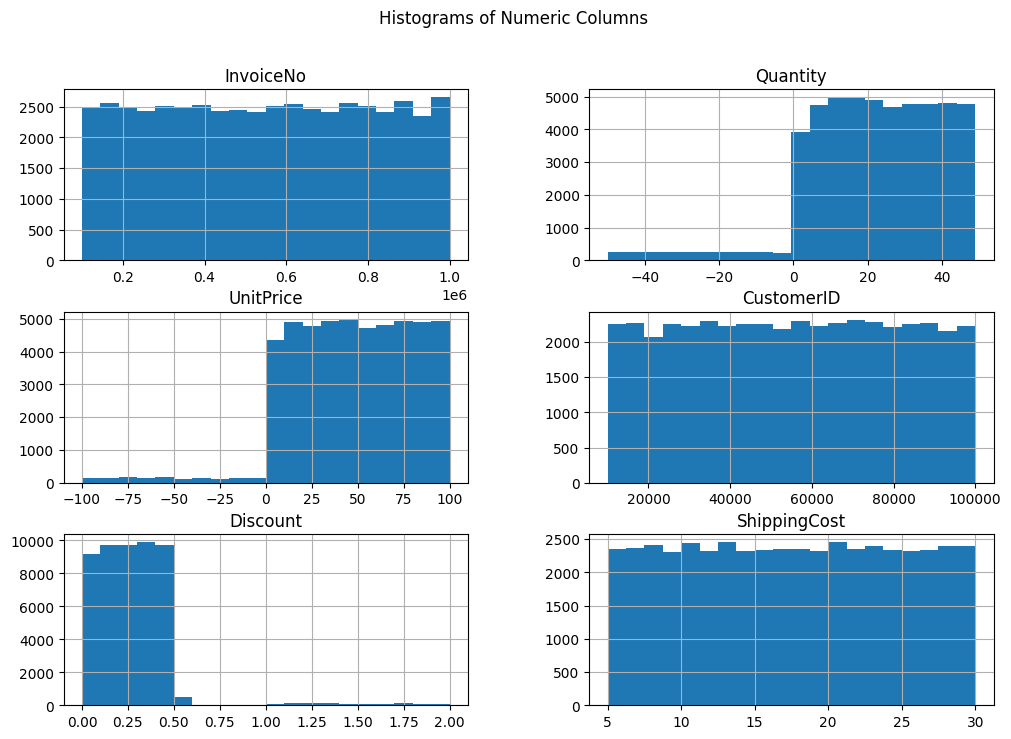

In [7]:
# Plot histograms for numeric columns to understand distributions
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns].hist(bins=20, figsize=(12, 8))
plt.suptitle("Histograms of Numeric Columns")
plt.show()

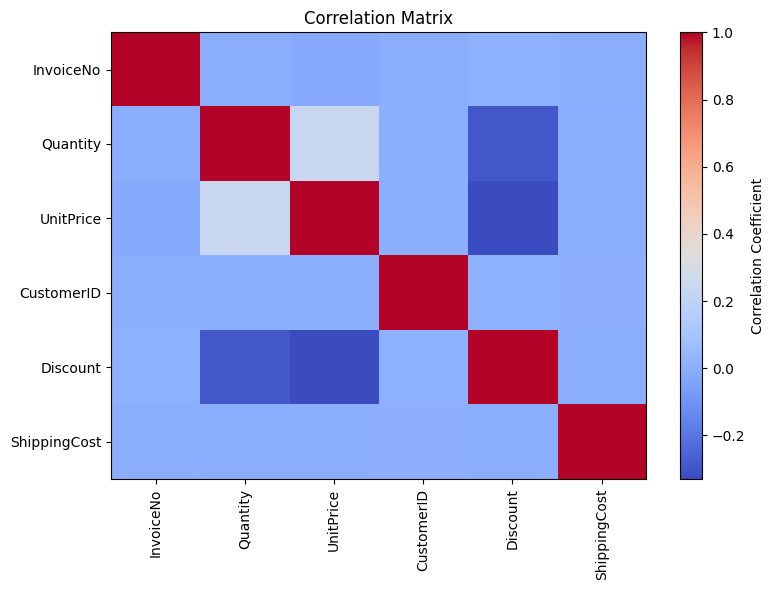

In [8]:
# Plot a correlation matrix using matplotlib
corr = df[numeric_columns].corr()
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar(label="Correlation Coefficient")
plt.xticks(range(len(numeric_columns)), numeric_columns, rotation=90)
plt.yticks(range(len(numeric_columns)), numeric_columns)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [10]:
# -----------------------------
# 3. Data Cleaning & Preprocessing
# -----------------------------
# Convert the InvoiceDate column to datetime format
if 'InvoiceDate' in df.columns:
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
    # Remove rows with invalid dates
    df = df[df['InvoiceDate'].notnull()]


# Check for missing values and handle them appropriately

# For numeric columns: Quantity, UnitPrice, Discount, ShippingCost
numeric_cols = ['Quantity', 'UnitPrice', 'Discount', 'ShippingCost']
for col in numeric_cols:
    if col in df.columns:
        if df[col].isnull().sum() > 0:
            median_val = df[col].median()
            df[col] = df[col].fillna(median_val)
            print(f"Filled missing values in '{col}' with median value: {median_val}")

# For categorical columns: InvoiceNo, StockCode, Description, CustomerID, Country, PaymentMethod, 
# Category, SalesChannel, ReturnStatus, ShipmentProvider, WarehouseLocation, OrderPriority
categorical_cols = ['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Country', 
                    'PaymentMethod', 'Category', 'SalesChannel', 'ReturnStatus', 
                    'ShipmentProvider', 'WarehouseLocation', 'OrderPriority']
for col in categorical_cols:
    if col in df.columns:
        if df[col].isnull().sum() > 0:
            mode_val = df[col].mode()[0]
            df[col] = df[col].fillna(mode_val)
            print(f"Filled missing values in '{col}' with mode value: {mode_val}")

# Feature Engineering: Create a new column "TotalSales" to represent overall sales after discount.
# TotalSales = Quantity * UnitPrice * (1 - Discount)
if all(col in df.columns for col in ['Quantity', 'UnitPrice', 'Discount']):
    df['TotalSales'] = df['Quantity'] * df['UnitPrice'] * (1 - df['Discount'])
    print("Created 'TotalSales' feature.")

Filled missing values in 'ShippingCost' with median value: 17.5
Filled missing values in 'CustomerID' with mode value: 53125.0
Filled missing values in 'WarehouseLocation' with mode value: Amsterdam
Created 'TotalSales' feature.


In [11]:
# -----------------------------
# 4. Normalizing and Standardizing the Data
# -----------------------------
# Choose numeric columns that are important for your ML model.
# Here, we'll scale: Quantity, UnitPrice, Discount, ShippingCost, and TotalSales.
features_to_scale = ['Quantity', 'UnitPrice', 'Discount', 'ShippingCost', 'TotalSales']
available_features = [col for col in features_to_scale if col in df.columns]

# Standardization: Scale features to have mean 0 and standard deviation 1.
scaler_standard = StandardScaler()
df_standardized = df.copy()
df_standardized[available_features] = scaler_standard.fit_transform(df[available_features])
print("\nStandardized data sample:")
print(df_standardized[available_features].head())

# Normalization: Scale features to range [0, 1].
scaler_minmax = MinMaxScaler()
df_normalized = df.copy()
df_normalized[available_features] = scaler_minmax.fit_transform(df[available_features])
print("\nNormalized data sample:")
print(df_normalized[available_features].head())


Standardized data sample:
   Quantity  UnitPrice  Discount  ShippingCost  TotalSales
0  0.872196  -1.368847  0.844303     -0.952703   -0.915060
1 -0.244025  -0.187814 -0.372696     -1.134582   -0.297115
2  1.486118  -0.550428  0.322732      0.786511    0.057889
3 -0.467269   0.870456 -0.590017     -0.911496    0.053610
4 -2.922956  -3.454322  5.327346      0.000738   -2.069259

Normalized data sample:
   Quantity  UnitPrice  Discount  ShippingCost  TotalSales
0  0.888889   0.508501  0.235028        0.2316    0.484705
1  0.686869   0.706221  0.095011        0.1804    0.545412
2  1.000000   0.645515  0.175021        0.7212    0.580288
3  0.646465   0.883388  0.070008        0.2432    0.579868
4  0.202020   0.159366  0.750805        0.5000    0.371316
